### Text to image generation with Stable-Diffusion-v1.5 on cpu



In [1]:
!pip install diffusers
!pip install torch

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.6 MB 7.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.6 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 5.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 5.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.6 MB 4.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.6 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 4.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 4.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 2.0/2.6 MB 4.4 MB/s eta 0:00:01
   ------------------------------- -------- 2.1/2.6 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 2.3/2.6 MB 4.2 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
from diffusers import StableDiffusionPipeline

ModuleNotFoundError: No module named 'torch'

In [4]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/Users/dsezer/NeueFische/temp/tests/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
# for local copy of the model move files from '.cashe/huggingface' to current directory 'models'
#!cp -rf ~.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5 models/runwayml--stable-diffusion-v1-5

#call pipe from local copy
#pipe = StableDiffusionPipeline.from_pretrained("model/runwayml--stable-diffusion-v1-5/snapshots/1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9/") 

In [6]:
pipe.safety_checker = None
pipe.requires_safety_checker = False

pipe = pipe.to("cpu")
pipe.get_active_adapters()

[]

In [7]:
prompt = 'A watercolor illustration of village near a forrest, little girl in the foreground.'

In [8]:
#prompt = "Drawing of a magical horse flying above a snowy village, show houses and a hill"
#negative_prompt = 'no rider'

In [ ]:
image = pipe(prompt, 
             #negative_prompt=negative_prompt,
             height=512, width=512,
             num_inference_steps=20).images[0]
image.save("figs/test_512.jpg")

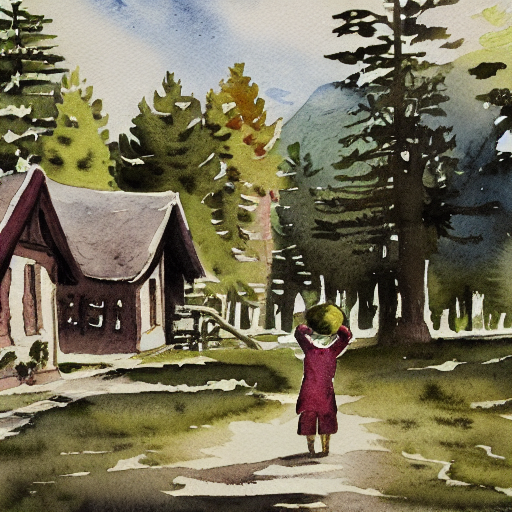

In [20]:
image

In [16]:
image = pipe(prompt, 
             #negative_prompt=negative_prompt,
             height=128, width=128,
             num_inference_steps=40).images[0]
image.save("figs/test_128.jpg")

  0%|          | 0/40 [00:00<?, ?it/s]

Test with smaller image sizes. Smaller sizes do not work.

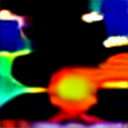

In [17]:
image

  0%|          | 0/30 [00:00<?, ?it/s]

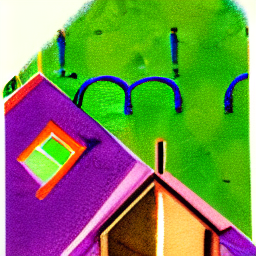

In [18]:
image = pipe(prompt, 
             #negative_prompt=negative_prompt,
             height=256, width=256,
             num_inference_steps=30).images[0]
image.save("figs/test_256.jpg")
image